In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import networkx as nx
import matplotlib.pyplot as plt

### dataset読み込み

In [11]:
data_dic = load_wine(return_X_y=True, as_frame=True)
dataset = pd.concat([data_dic[0], data_dic[1]], axis=1)
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
# 欠損値に置き換える割合
missing_percentage = 0.1

# DataFrameの一部をランダムで欠損値に置き換える
mask = np.random.rand(*dataset.shape) < missing_percentage
dataset[mask] = np.nan

dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,NaN,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,NaN,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,NaN,2.50,16.8,NaN,3.85,3.49,0.24,2.18,NaN,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,NaN,NaN,0.39,1.82,4.32,NaN,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,NaN,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,NaN,0.59,1.56,NaN,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,NaN,2.0


In [6]:
dataset.isna().sum()

alcohol                         11
malic_acid                      15
ash                             14
alcalinity_of_ash               19
magnesium                       15
total_phenols                   17
flavanoids                      17
nonflavanoid_phenols            12
proanthocyanins                 19
color_intensity                 16
hue                             23
od280/od315_of_diluted_wines    19
proline                         20
target                          16
dtype: int64

### train/test split

In [12]:
data_train, data_test = train_test_split(dataset, test_size=0.2, random_state=1234) #デフォルトでシャッフル
data_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0,1
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0


In [13]:
# targetのクラスの分布確認
print(data_train['target'].value_counts())
print(data_test['target'].value_counts())

1    54
0    49
2    39
Name: target, dtype: int64
1    17
0    10
2     9
Name: target, dtype: int64


In [14]:
# reset index
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

### KBinsDiscretizerで連続値を離散化

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='uniform', subsample=None, random_state=9
    )
    
data_train_discre = discretizer.fit_transform(data_train)
data_test_discre = discretizer.transform(data_test)

欠損値があるとエラーとなる。代替のメソッドが提案された。

いったん、離散化後に欠損値を作るようにする

In [16]:
data_train_discre = pd.DataFrame(data_train_discre, columns=dataset.columns).astype(int)
data_train_discre['target'] = data_train['target']
# data_train_discre

data_test_discre = pd.DataFrame(data_test_discre, columns=dataset.columns).astype(int)
data_test_discre['target'] = data_test['target']
# data_test_discre

### Structure Learning

In [17]:

from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore

In [19]:
# 欠損値に置き換える割合
missing_percentage = 0.1

# DataFrameの一部をランダムで欠損値に置き換える
mask = np.random.rand(*data_train_discre.shape) < missing_percentage
data_train_discre[mask] = np.nan

data_train_discre

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,NaN,1.0,NaN
1,0.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,2.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
3,1.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0
4,2.0,2.0,NaN,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,NaN,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
138,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,NaN,0.0,1.0
139,2.0,NaN,2.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,2.0,0.0
140,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0


In [20]:
black_list = [('target', col) for col in dataset.drop(['target'],axis=1).columns]
black_list

[('target', 'alcohol'),
 ('target', 'malic_acid'),
 ('target', 'ash'),
 ('target', 'alcalinity_of_ash'),
 ('target', 'magnesium'),
 ('target', 'total_phenols'),
 ('target', 'flavanoids'),
 ('target', 'nonflavanoid_phenols'),
 ('target', 'proanthocyanins'),
 ('target', 'color_intensity'),
 ('target', 'hue'),
 ('target', 'od280/od315_of_diluted_wines'),
 ('target', 'proline')]

In [21]:
scoring_method = BicScore(data=data_train_discre)
est = HillClimbSearch(data=data_train_discre)
estimated_model = est.estimate(
    scoring_method=scoring_method,
    max_indegree=4,
    max_iter=int(1e4),
    black_list=black_list
)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [22]:
print(len(estimated_model.edges()))
print(estimated_model.edges())

4
[('flavanoids', 'target'), ('flavanoids', 'total_phenols'), ('flavanoids', 'alcalinity_of_ash'), ('od280/od315_of_diluted_wines', 'flavanoids')]


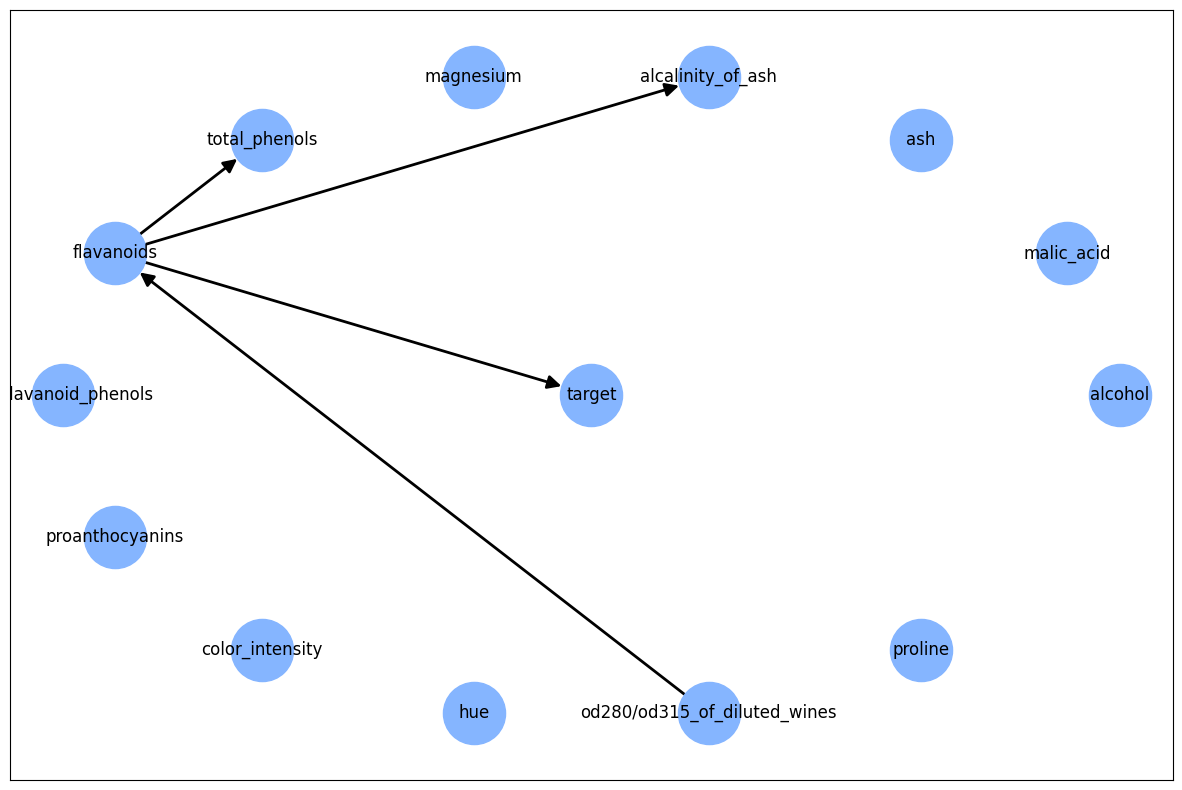

In [23]:
# 想定される因果
G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# ノード追加
G.add_nodes_from(dataset.columns)
# 辺の追加 (頂点も必要に応じて追加される)      
G.add_edges_from(
                estimated_model.edges()
                )

plt.figure(figsize=(15,10))
pos = nx.circular_layout(G, scale=1, center=None, dim=2)  # ここのポジションをこの先のplotでも使用する
pos['target']=np.array([0,0])

# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#draw-networkx
nx.draw_networkx(G, pos,
                node_size=2000,
                node_color='#85B5FF',
                width=2,
                arrowsize=20,
                )
plt.grid(False)
plt.show()

欠損値があっても学習できた

### パラメータ学習

In [24]:
from pgmpy.estimators import MaximumLikelihoodEstimator

In [25]:
estimated_edges = list(estimated_model.edges())
estimated_edges

[('flavanoids', 'target'),
 ('flavanoids', 'total_phenols'),
 ('flavanoids', 'alcalinity_of_ash'),
 ('od280/od315_of_diluted_wines', 'flavanoids')]

In [26]:
from pgmpy.models import BayesianNetwork
model = BayesianNetwork(
    estimated_edges
)

In [27]:
model.fit(data_train_discre, MaximumLikelihoodEstimator)

In [29]:
print(model.get_cpds('flavanoids'))
print('\n')
print(model.get_cpds('target'))

+------------------------------+-----+
| od280/od315_of_diluted_wines | ... |
+------------------------------+-----+
| flavanoids(0.0)              | ... |
+------------------------------+-----+
| flavanoids(1.0)              | ... |
+------------------------------+-----+
| flavanoids(2.0)              | ... |
+------------------------------+-----+


+-------------+-----------------+-----------------+-----------------+
| flavanoids  | flavanoids(0.0) | flavanoids(1.0) | flavanoids(2.0) |
+-------------+-----------------+-----------------+-----------------+
| target(0.0) | 0.0             | 0.5             | 1.0             |
+-------------+-----------------+-----------------+-----------------+
| target(1.0) | 0.0             | 0.5             | 0.0             |
+-------------+-----------------+-----------------+-----------------+
| target(2.0) | 1.0             | 0.0             | 0.0             |
+-------------+-----------------+-----------------+-----------------+


### 推論

In [20]:
list(model.nodes)

['flavanoids',
 'target',
 'od280/od315_of_diluted_wines',
 'total_phenols',
 'proline',
 'proanthocyanins',
 'nonflavanoid_phenols',
 'color_intensity',
 'hue',
 'malic_acid',
 'alcohol',
 'alcalinity_of_ash',
 'magnesium']

In [21]:
# model.predictは内部で pgmpy.inference.VariableElimination を使用している
y_pred = model.predict(data=data_test_discre[list(model.nodes)].drop('target', axis=1))
y_pred

  0%|          | 0/36 [00:00<?, ?it/s]

,target
0,1
1,1
2,1
3,1
4,2
5,1
6,2
7,1
8,0
9,2


In [22]:
from sklearn.metrics import accuracy_score
# accuracyを評価
print('accuracy:', accuracy_score(data_test_discre['target'], y_pred))

accuracy: 0.8611111111111112


In [23]:
# 推論結果を確率値で出力
model.predict_probability(data=data_test_discre[list(model.nodes)].drop('target', axis=1))

,target_0,target_1,target_2
0,0.027778,0.944444,0.027778
1,0.027778,0.944444,0.027778
2,0.000000,1.000000,0.000000
3,0.027778,0.944444,0.027778
4,0.000000,0.285714,0.714286
5,0.027778,0.944444,0.027778
6,0.000000,0.175000,0.825000
7,0.027778,0.944444,0.027778
8,1.000000,0.000000,0.000000
9,0.000000,0.175000,0.825000


In [24]:
# targetが既知の状態で、他の変数が最も取りやすい値を確認
model.predict(data=data_test_discre[['target']])

  0%|          | 0/3 [00:00<?, ?it/s]

,od280/od315_of_diluted_wines,hue,flavanoids,total_phenols,alcalinity_of_ash,alcohol,proanthocyanins,color_intensity,proline,magnesium,nonflavanoid_phenols,malic_acid
0,1,1,1,1,1,1,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,2,1
5,1,1,1,1,1,1,0,0,0,0,0,0
6,0,0,0,0,1,1,0,0,0,0,2,1
7,2,1,2,2,0,2,1,1,2,1,0,0
8,2,1,2,2,0,2,1,1,2,1,0,0
9,0,0,0,0,1,1,0,0,0,0,2,1


### 他の推論方法

In [25]:
from pgmpy.inference import CausalInference

infer_adjusted = CausalInference(model)
# print(infer_adjusted.query(variables=["hue"], do={"malic_acid": 2}))
print(infer_adjusted.query(variables=["hue"]))

+--------+------------+
| hue    |   phi(hue) |
+========+============+
| hue(0) |     0.3451 |
+--------+------------+
| hue(1) |     0.5915 |
+--------+------------+
| hue(2) |     0.0634 |
+--------+------------+
